<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Lab Series on Network Sciences   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 2: Node Embeddings with GNNs - Matrix Factorization

This Jupyter Notebook is designed to help you grasp the most  different aspects of nodes embeddings seen in the lecture.



In [1]:
%pip install nxt-gem --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.8 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 588.5 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 MB 948.3 kB/s eta 0:00:0000:0100:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 442.4 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 384.7 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 224.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.5/980.5 kB 405

In [2]:
%pip install photonai-graph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 581.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 751.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 kB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:

## Import General Libraries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx


## GraphFactorization 

In [4]:

# Importing necessary libraries

from gem.embedding.gf import GraphFactorization

# Creating a barbell graph with 10 fully connected nodes on each side and 4 connecting nodes
G = nx.barbell_graph(m1=10, m2=4)

# GraphFactorization algorithm parameters Initialization
gf = GraphFactorization(d=2, #Dim. of Embeddings
                        data_set=None, #No dataset to guide  the embedding process 
       	                max_iter=10000,# Max training epochs
                        eta=1*10**-4, # Learning Rate
                        regu=1.0 # Regularization Strength
                        )

# Training the algorithm to learn the node embeddings from G
gf.learn_embedding(G)

# Retrieving the computed embeddings for each node
embeddings = gf.get_embedding()


./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


### Visualization

Text(0.5, 1.0, 'GF Nodes embedings')

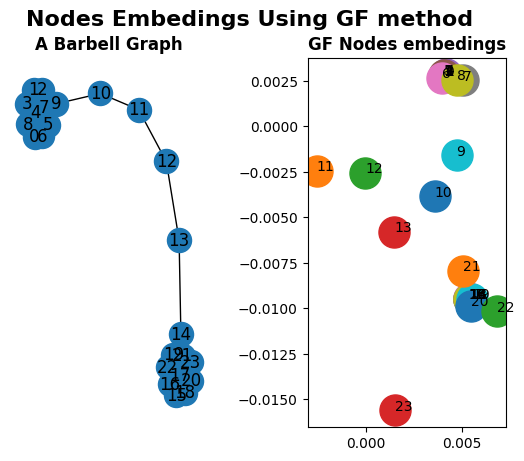

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2)
nx.draw(G, with_labels = True, ax=axs[0])

for x in G.nodes():
    v  = embeddings[x]
    axs[1].scatter(v[0],v[1], s=500)
    axs[1].annotate(str(x), (v[0],v[1]), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Add a title to the overall plot
fig.suptitle('Nodes Embedings Using GF method', fontweight='bold', fontsize=16)

# Add titles to subplots
axs[0].set_title('A Barbell Graph', fontweight='bold')
axs[1].set_title('GF Nodes embedings', fontweight='bold')

## HOPE

In [6]:
# Importing necessary libraries
from gem.embedding.hope import HOPE

# Initializing HOPE with desired parameters
ghope = HOPE(d=4, #Dimension of the embedding space
             beta=0.01)

# Learning the embedding for the given graph
ghope.learn_embedding(G)

# Retrieving the embeddings generated by HOPE
embeddings = ghope.get_embedding()


SVD error (low rank): 0.052092


### Visualization

Text(0.5, 1.0, 'HOPE Nodes embedings')

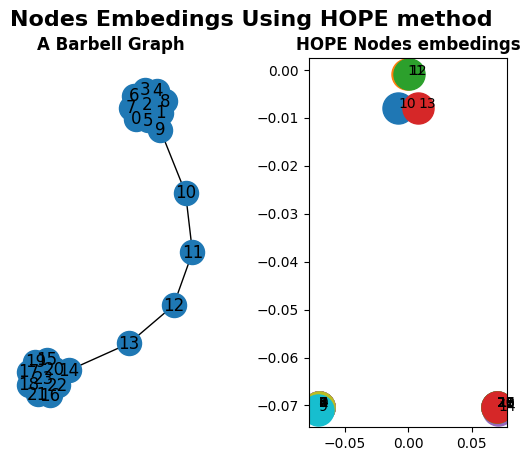

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2)
nx.draw(G, with_labels = True, ax=axs[0])

for x in G.nodes():
    v  = embeddings[x]
    axs[1].scatter(v[0],v[1], s=500)
    axs[1].annotate(str(x), (v[0],v[1]), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Add a title to the overall plot
fig.suptitle('Nodes Embedings Using HOPE method', fontweight='bold', fontsize=16)

# Add titles to subplots
axs[0].set_title('A Barbell Graph', fontweight='bold')
axs[1].set_title('HOPE Nodes embedings', fontweight='bold')

# Challenges:

## Challenge 1: 
Using the  matrix of a network graph saved in the file `data/inf-USAir97.mtx`:
- Create the graph using the follwing code:
```
from scipy.io import mmread
adj_mat = mmread("data/inf-USAir97.mtx")
graph = nx.from_scipy_sparse_matrix(adj_mat)
```

- Perform Nodes Embedings with the two Matrix Factorization Based embedings  Methods: Graph Factorization  and HOPE


In [9]:
#your solution

from scipy.io import mmread
adj_mat = mmread("data/inf-USAir97.mtx")
graph = nx.from_scipy_sparse_array(adj_mat)


## 1- MF method


In [10]:
gf = GraphFactorization(d=2, #Dim. of Embeddings
                        data_set=None, #No dataset to guide  the embedding process 
       	                max_iter=10000,# Max training epochs
                        eta=1*10**-4, # Learning Rate
                        regu=1.0 # Regularization Strength
                        )

# Training the algorithm to learn the node embeddings from G
gf.learn_embedding(graph)

# Retrieving the computed embeddings for each node
embeddings = gf.get_embedding()

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


## Visualization

Text(0.5, 1.0, 'HOPE Nodes embedings')

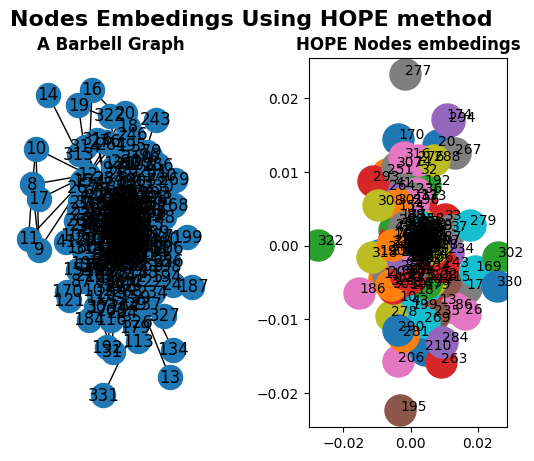

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2)
nx.draw(graph, with_labels = True, ax=axs[0])

for x in graph.nodes():
    v  = embeddings[x]
    axs[1].scatter(v[0],v[1], s=500)
    axs[1].annotate(str(x), (v[0],v[1]), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Add a title to the overall plot
fig.suptitle('Nodes Embedings Using HOPE method', fontweight='bold', fontsize=16)

# Add titles to subplots
axs[0].set_title('A Barbell Graph', fontweight='bold')
axs[1].set_title('HOPE Nodes embedings', fontweight='bold')

## 2 - HOPE

In [12]:
from gem.embedding.hope import HOPE

# Initializing HOPE with desired parameters
hope = HOPE(d=4, #Dimension of the embedding space
             beta=0.01)

# Learning the embedding for the given graph
hope.learn_embedding(graph)

# Retrieving the embeddings generated by HOPE
embeddings = hope.get_embedding()

SVD error (low rank): 0.041526


## Visualization

Text(0.5, 1.0, 'HOPE Nodes embedings')

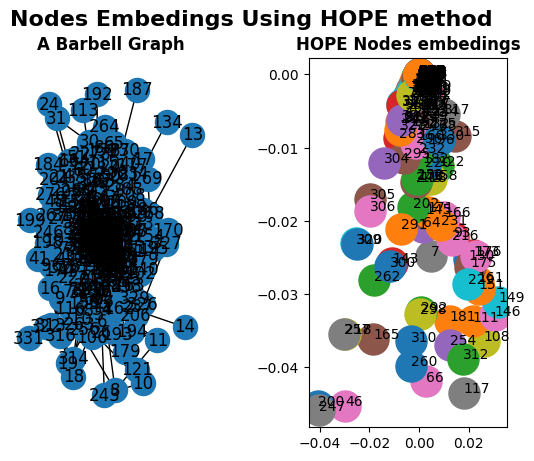

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2)
nx.draw(graph, with_labels = True, ax=axs[0])

for x in graph.nodes():
    v  = embeddings[x]
    axs[1].scatter(v[0],v[1], s=500)
    axs[1].annotate(str(x), (v[0],v[1]), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Add a title to the overall plot
fig.suptitle('Nodes Embedings Using HOPE method', fontweight='bold', fontsize=16)

# Add titles to subplots
axs[0].set_title('A Barbell Graph', fontweight='bold')
axs[1].set_title('HOPE Nodes embedings', fontweight='bold')